<a href="https://colab.research.google.com/github/Kr-Balaji/Lenet-Implementation/blob/main/LeNet_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import backend




In [ ]:
tf.__version__

'2.7.0'

In [ ]:
## Loading the MNIST dataset
(x_train,y_train),(x_test,y_test) =tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape ## So, its a greyscale image

(60000, 28, 28)

In [ ]:
# parameters for MNIST dataset:
num_classes=10
image_width=28
image_height=28
image_channels=1

LeNet-CNN Architecture

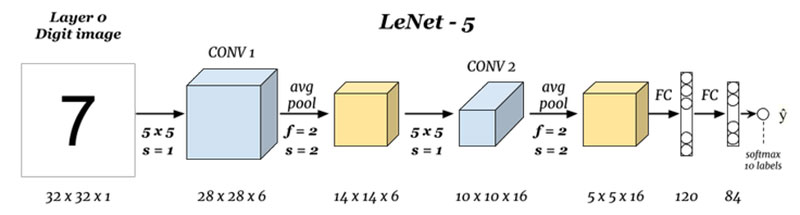


### Since the Image is of 32x32x1 and the image which we have is of 28x28x1
###So,we do padding

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

In [ ]:
# reshaping the training data ---> for saferside
# reshaping in the "Channel Last" format.

x_train=x_train.reshape(x_train.shape[0],image_width,image_height,image_channels)
x_test=x_test.reshape(x_test.shape[0],image_width,image_height,image_channels)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
# Scale data to the range of [0.0,1.0]

x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

In [ ]:
# pad the data to 32X32 for use in LeNet5 network
x_train = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_test = np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

In [ ]:
#parameters for the image 

num_classes=10
image_width=32
image_height=32
image_channels=1

### Building the model

In [ ]:
class LeNet:
  def init(numChannels, imgRows, imgCols, numClasses, weightsPath=None):
    image_shape=(imgRows,imgCols,numChannels)

    model=tf.keras.Sequential()

    # defining the first Conv
    model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5),strides=(1,1),padding='Valid',activation=tf.keras.activations.tanh, input_shape=image_shape))
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))


    # Defining the second Conv
    model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(5, 5),strides=(1,1),padding='Valid',activation=tf.keras.activations.tanh))
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))


    #Flattening the layers to input into a neural network
    model.add(tf.keras.layers.Flatten())

    # Inputting the flatten image to the Dense Neural network
    model.add(tf.keras.layers.Dense(units=120,activation=tf.keras.activations.tanh))

    model.add(tf.keras.layers.Dense(units=84,activation=tf.keras.activations.tanh))


    #Defining the output layer
    model.add(tf.keras.layers.Dense(units=num_classes,activation=tf.keras.activations.softmax))

    #if the weights path is given ,the we need to load the given path
    if weightsPath is not None:
      model.load_weights(weightsPath)


    return model


    

In [ ]:
model=LeNet.init(image_channels,image_width,image_height,num_classes)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

### Train Model

In [ ]:
# define callback function for training termination criteria
#accuracy_cutoff = 0.99
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if(logs.get('accuracy') > 0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True


history = model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test),
        batch_size=128, epochs=100, verbose=1, callbacks=[myCallback()])

Epoch 1/100
469/469 [==============================] - 17s 8ms/step - loss: 1.2122 - accuracy: 0.6859 - val_loss: 0.5858 - val_accuracy: 0.8572
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.4848 - accuracy: 0.8730 - val_loss: 0.3968 - val_accuracy: 0.8925
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.3744 - accuracy: 0.8946 - val_loss: 0.3304 - val_accuracy: 0.9065
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.3243 - accuracy: 0.9062 - val_loss: 0.2911 - val_accuracy: 0.9171
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2908 - accuracy: 0.9152 - val_loss: 0.2638 - val_accuracy: 0.9247
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2646 - accuracy: 0.9229 - val_loss: 0.2406 - val_accuracy: 0.9306
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2427 - accuracy: 0.9293 - val_loss: 0.2207 - val_accuracy: 0.937

Text(0.5, 1.0, 'Training and validation loss')

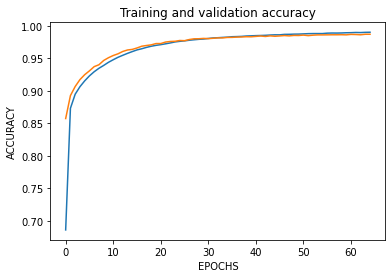

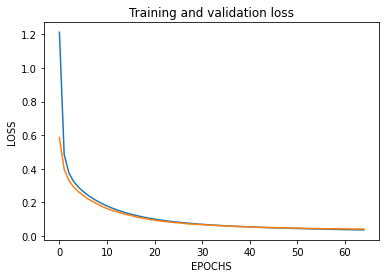

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.title('Training and validation accuracy')
plt.figure()




plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.title('Training and validation loss')







In [ ]:
(loss, accuracy) = model.evaluate(x_test, y_test,
                                  batch_size=128, verbose=1)

79/79 [==============================] - 0s 4ms/step - loss: 0.0414 - accuracy: 0.9869


### Model Prediction

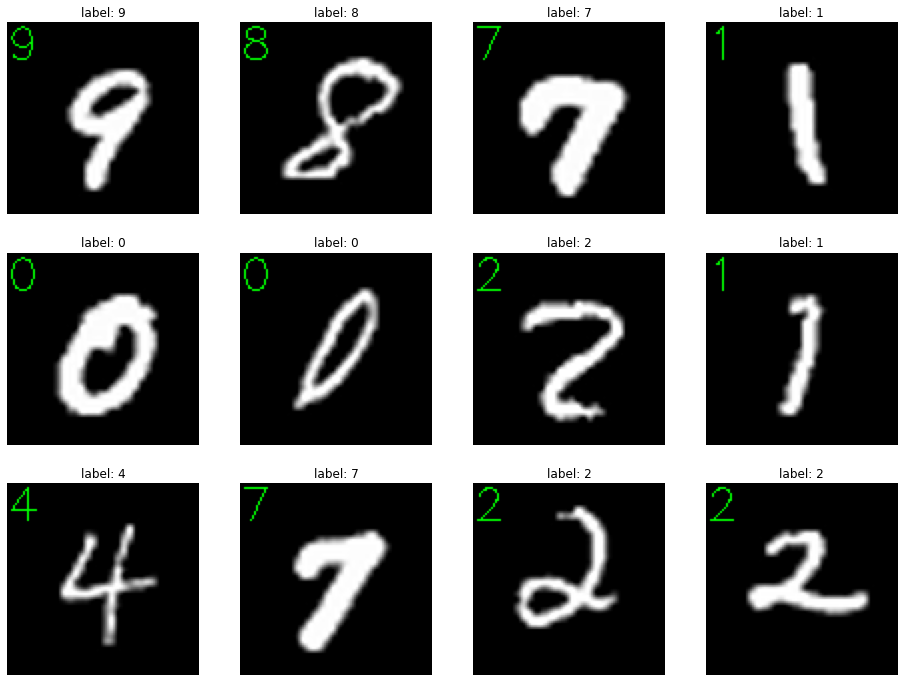

In [ ]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

# set up matplotlib fig, and size it to fit 3x4 pics
nrows = 3
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

# randomly select a few testing digits
num_predictions = 12
test_indices = np.random.choice(np.arange(0, len(y_test)), size=(num_predictions,))
test_images = np.stack(([x_test[i] for i in test_indices]))
test_labels = np.stack(([y_test[i] for i in test_indices]))

# compute predictions
predictions = model.predict(test_images)

for i in range(num_predictions):
    # select the most probable class
    prediction = np.argmax(predictions[i])

    # rescale the test image
    image = (test_images[i] * 255).astype("uint8")

    # resize the image from a 28 x 28 image to a 96 x 96 image so we can better see it
    image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_CUBIC)

    # convert grayscale image to RGB color
    image = cv2.merge([image] * 3)

    # select prediction text color
    if prediction == test_labels[i]:
        rgb_color = (0, 255, 0) # green for correct predictions
    else:
        rgb_color = (255, 0, 0) # red for wrong predictions

    # show the image and prediction
    cv2.putText(image, str(prediction), (0, 18),
                cv2.FONT_HERSHEY_SIMPLEX, 0.75, rgb_color, 1)
    
    # set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1, title="label: %s" % test_labels[i])
    sp.axis('Off') # don't show axes (or gridlines)
    plt.imshow(image)

# show figure matrix
plt.show()